# MCRL for policy IV

In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [2]:
def reset():
    st= [0]*16
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

In [4]:
fi = [[0,2],[2,7],[2,4],[6,5],[3,1]]

In [5]:
def member(i , fi):
    mem=[]
    if i in fi[0]:
        if i !=fi[0][0]:
            mem.append(fi[0][0])
        if i !=fi[0][1]:
            mem.append(fi[0][1])
        
    if i in fi[1]:
        if i !=fi[1][0]:
            mem.append(fi[1][0])
        if i !=fi[1][1]:
            mem.append(fi[1][1])
        
    if i in fi[2]:
        if i !=fi[2][0]:
            mem.append(fi[2][0])
        if i !=fi[2][1]:
            mem.append(fi[2][1])
    
    if i in fi[3]:
        if i !=fi[3][0]:
            mem.append(fi[3][0])
        if i !=fi[3][1]:
            mem.append(fi[3][1])
    
    if i in fi[4]:
        if i !=fi[4][0]:
            mem.append(fi[4][0])
        if i !=fi[4][1]:
            mem.append(fi[4][1])
    
    return mem
    

In [6]:
member(1,fi)[0]

3

In [7]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% d : % d"%(key, value))
 

In [8]:
def env(action,st):
    reward = np.zeros(8)
    failure_time = np.zeros(8)
    
    for a in range(8):
        if (action[a] == 1):
            for j in range(len(member(a,fi))):
                action[member(a,fi)[j]] = 1
                
            
        failure_time[a] = random.weibullvariate(weibull_scale[a],weibull_shape[a])

        if failure_time[a] <= st[a]: # fail
            st[a+8]=1

            tpi = 0 
            for j in range(len(member(a,fi))):
                tpi+=tp[member(a,fi)[j]]

            tfi = 0
            for j in range(len(member(a,fi))):
                tfi+=tf[member(a,fi)[j]]

            reward[a] =- (time_interval/(0.8*time_interval*sum((tpi,tp[a]))))*time_interval*math.ceil(0.8*sum((tfi,tf[a]))/time_interval)

            
        else :
            #st[a+8]=0
            st[a] +=5
            reward[a] = 5
            
            
        if action[a]==1:            
            if (st[a+8]==0):
                tpi = 0 
                for j in range(len(member(a,fi))):
                    tpi+=tp[member(a,fi)[j]]
                reward[a] = - (time_interval/(0.8*time_interval*sum((tpi,tp[a]))))*0.8*sum((tpi,tp[a]))
            
            if (st[a+8]==1):
                tpi = 0 
                for j in range(len(member(a,fi))):
                    tpi+=tp[member(a,fi)[j]]

                tfi = 0
                for j in range(len(member(a,fi))):
                    tfi+=tf[member(a,fi)[j]]

                reward[a] =- (time_interval/(0.8*time_interval*sum((tpi,tp[a]))))*time_interval*math.ceil(0.8*sum((tfi,tf[a]))/time_interval)

                
            st[a]=0
            st[a+8]=0  

    
    return (tuple(st) , reward)
        

In [9]:
env(list((0,1,0,0,0,1,0,0)),list((800,1,20,14,10,20,50,1,0,0,0,0,0,0,0,0)))

((805, 0, 25, 0, 15, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0),
 array([ 5., -1.,  5., -1.,  5., -1., -1.,  5.]))

# pi function for each components

In [10]:
ALL_POSSIBLE_ACTIONS = [0,1]

In [11]:
def choose_action(state , pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears):
    action = np.zeros(8)
    
    for i in range(8):
        
        if state[i+8]==1:
            action[i] = 1
            
        else:
            st = (state[i],state[i+8])
            if i == 0:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_tire[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i== 1:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_transmissin[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i == 2:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_wheel[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i == 3:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_coupling[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i == 4:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_motor[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i == 5:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_brake[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i == 6:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_steering[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
            if i == 7:
                action[i]= np.random.choice(ALL_POSSIBLE_ACTIONS, p=[pi_gears[(st,a)] for a in ALL_POSSIBLE_ACTIONS])
    return action    

In [12]:
pi_tire = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_transmissin= defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_wheel = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_coupling = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_motor = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_brake = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_steering = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))
pi_gears = defaultdict(lambda: 1/len(ALL_POSSIBLE_ACTIONS))

In [13]:
Q_tire = np.zeros((100000 ,2) + (2,))
Q_transmissin = np.zeros((100000 ,2) + (2,))
Q_wheel = np.zeros((100000 ,2) + (2,))
Q_coupling = np.zeros((100000 ,2) + (2,))
Q_motor = np.zeros((100000 ,2) + (2,))
Q_brake = np.zeros((100000 ,2) + (2,))
Q_steering = np.zeros((100000 ,2) + (2,))
Q_gears = np.zeros((100000 ,2) + (2,))

In [14]:
returns_tire =np.zeros((100000 ,2) + (2,))
returns_transmissin =np.zeros((100000 ,2) + (2,))
returns_wheel =np.zeros((100000 ,2) + (2,))
returns_coupling =np.zeros((100000 ,2) + (2,))
returns_motor =np.zeros((100000 ,2) + (2,))
returns_brake =np.zeros((100000 ,2) + (2,))
returns_steering =np.zeros((100000 ,2) + (2,))
returns_gears =np.zeros((100000 ,2) + (2,))

In [15]:
N_tire = np.zeros((100000 ,2) + (2,))
N_transmissin = np.zeros((100000 ,2) + (2,))
N_wheel = np.zeros((100000 ,2) + (2,))
N_coupling = np.zeros((100000 ,2) + (2,))
N_motor = np.zeros((100000 ,2) + (2,))
N_brake = np.zeros((100000 ,2) + (2,))
N_steering = np.zeros((100000 ,2) + (2,))
N_gears = np.zeros((100000 ,2) + (2,))

In [16]:
a=choose_action(list((800,1,20,14,10,20,50,1,1,0,0,0,0,0,0,0)), pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)
a

array([1., 1., 1., 1., 0., 1., 1., 0.])

In [17]:
env(a,list((800,1,20,14,10,20,50,1,1,0,0,0,0,0,0,0)))

((0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 array([-6.09756098, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ]))

# Episode functions

In [18]:
GAMMA = 0.50
def play_episode(pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears):
    #S0,A0,R1,S1,A1,R2,S2,A2,R3 ,...
    s= reset()
    a= choose_action(s,pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)
    
    #r(t) results from taking action a(t-1) from s(t-1) and landing in s(t)
    states_actions_rewards = [((s, a, 0))]
    
    for j in range(running_time//time_interval +1):
    
        s , r = env(a,list(s))
        if (j == running_time//time_interval):
            states_actions_rewards.append((s, None, r))
        else:
            a= choose_action(s,pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)
            states_actions_rewards.append((s,a, r))
            
    
     # calculate the returns by working backwards from the terminal state
    G = np.zeros(8)
    states_actions_returns = []
    first = True
    for s, a, r in reversed(states_actions_rewards):
        
       # the value of the terminal state is 0 by definition
       # we should ignore the first state we encounter
        # and ignore the last G, which is meaningless since it doesn't correspond to any move
        if first:
            first = False
        else:
            states_actions_returns.append((s, a, G))
        G = r + GAMMA*G
    
    return states_actions_returns


In [19]:
#play_episode(pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)

# Run all episodes

# transmission and coupling

In [36]:
scores_tra = []
scores_cou = []
for epi in range(1000 +1):# Looping through episodes 
    
    epsilon = 1/(epi+1)
    # generate an episode using pi
    states_actions_returns = play_episode(pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)
    rewards_tra = []
    rewards_cou = []
    # calculate Q(s,a)
    
    seen_state_action_pairs_transmissin = set()
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_transmissin = (s[1] ,s[1+8])
        state_action_transmissin = (s_t_transmissin,int(a[1]))
        
        if state_action_transmissin not in seen_state_action_pairs_transmissin:
            
            returns_transmissin[s_t_transmissin][int(a[1])] += G[1]
            N_transmissin[s_t_transmissin][int(a[1])] +=1
                
            Q_transmissin[s_t_transmissin][int(a[1])] = returns_transmissin[s_t_transmissin][int(a[1])] /N_transmissin[s_t_transmissin][int(a[1])] # Average reward across episodes
            
            seen_state_action_pairs_transmissin.add(state_action_transmissin)
            rewards_tra.append(G[1])   
            #for each s in the episode         
            A_star = np.argmax(Q_transmissin[s_t_transmissin])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_transmissin[(s_t_transmissin,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_transmissin[(s_t_transmissin,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
    
    
    seen_state_action_pairs_coupling = set()
    
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_coupling = (s[3] ,s[3+8])
        state_action_coupling = (s_t_coupling,int(a[3]))
        
        if state_action_coupling not in seen_state_action_pairs_coupling:
            
            returns_coupling[s_t_coupling][int(a[3])] += G[3]
            N_coupling[s_t_coupling][int(a[3])] +=1
                
            Q_coupling[s_t_coupling][int(a[3])] = returns_coupling[s_t_coupling][int(a[3])] /N_coupling[s_t_coupling][int(a[3])] # Average reward across episodes
            
            seen_state_action_pairs_coupling.add(state_action_coupling)
            rewards_cou.append(G[3])   
            #for each s in the episode         
            A_star = np.argmax(Q_coupling[s_t_coupling])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_coupling[(s_t_coupling,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_coupling[(s_t_coupling,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
    
    scores_tra.append(sum(rewards_tra))
    scores_cou.append(sum(rewards_cou))

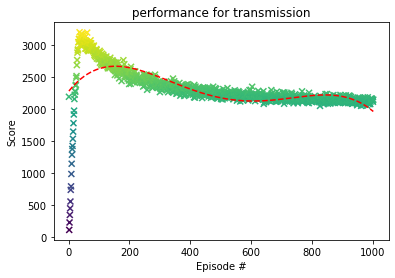

In [37]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_tra) + 1)
y = scores_tra
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for transmission ')
plt.show()

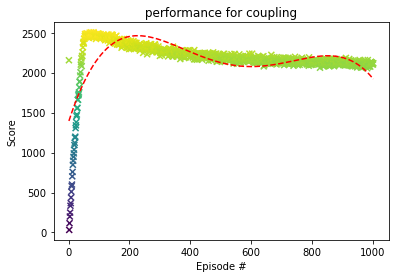

In [38]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_cou) + 1)
y = scores_cou
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for coupling ')
plt.show()

In [23]:
def ac (current_state):
    action = np.zeros(8)
    action[1] = np.argmax(Q_transmissin[(current_state[1],current_state[1+8])])
    action[3] = np.argmax(Q_coupling[(current_state[3],current_state[3+8])])
    return action

In [24]:
#transmission
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[1,3]] = max(ac(current_state)[[1,3]])
    if action[1] ==1:
        time_replace.append(current_state[1])
    obs , r = env(action,list(current_state))
    current_state = obs
CountFrequency(time_replace)

 990 :  128
 975 :  19
 980 :  28
 945 :  1
 985 :  45
 970 :  16
 965 :  7
 960 :  4
 950 :  2
 955 :  1
 920 :  1


In [25]:
#coupling
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[1,3]] = max(ac(current_state)[[1,3]])
    if action[3] ==1:
        time_replace.append(current_state[3])
    obs , r = env(action,list(current_state))
    #print (current_state[5] ,action[5],r[5],obs[5] )
    current_state = obs
CountFrequency(time_replace)

 990 :  173
 980 :  22
 985 :  34
 975 :  10
 965 :  3
 945 :  2
 970 :  5
 930 :  1
 935 :  1
 950 :  1


# brake and steering wheel

In [39]:
scores_bra = []
scores_ste = []
for epi in range(1300 +1):# Looping through episodes 
    
    epsilon = 1/(epi+1)
    # generate an episode using pi
    states_actions_returns = play_episode(pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)
    rewards_bra = []
    rewards_ste = []
    # calculate Q(s,a)
    
    seen_state_action_pairs_brake = set()
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_brake = (s[5] ,s[5+8])
        state_action_brake = (s_t_brake,int(a[5]))
        
        if state_action_brake not in seen_state_action_pairs_brake:
            
            returns_brake[s_t_brake][int(a[5])] += G[5]
            N_brake[s_t_brake][int(a[5])] +=1
                
            Q_brake[s_t_brake][int(a[5])] = returns_brake[s_t_brake][int(a[5])] /N_brake[s_t_brake][int(a[5])] # Average reward across episodes
            
            seen_state_action_pairs_brake.add(state_action_brake)
            rewards_bra.append(G[5])    
            #for each s in the episode         
            A_star = np.argmax(Q_brake[s_t_brake])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_brake[(s_t_brake,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_brake[(s_t_brake,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
    
    
    seen_state_action_pairs_steering = set()
    
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_steering = (s[6] ,s[6+8])
        state_action_steering = (s_t_steering,int(a[6]))
        
        if state_action_steering not in seen_state_action_pairs_steering:
            
            returns_steering[s_t_steering][int(a[6])] += G[6]
            N_steering[s_t_steering][int(a[6])] +=1
                
            Q_steering[s_t_steering][int(a[6])] = returns_steering[s_t_steering][int(a[6])] /N_steering[s_t_steering][int(a[6])] # Average reward across episodes
            
            seen_state_action_pairs_steering.add(state_action_steering)
            rewards_ste.append(G[6])    
            #for each s in the episode         
            A_star = np.argmax(Q_steering[s_t_steering])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_steering[(s_t_steering,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_steering[(s_t_steering,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))

                    
    scores_bra.append(sum(rewards_bra))
    scores_ste.append(sum(rewards_ste))

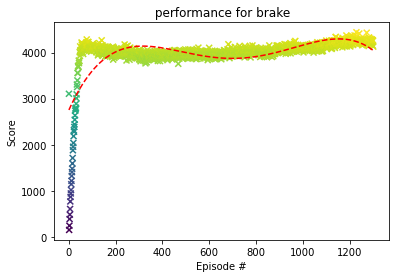

In [40]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_bra) + 1)
y = scores_bra
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for brake')
plt.show()

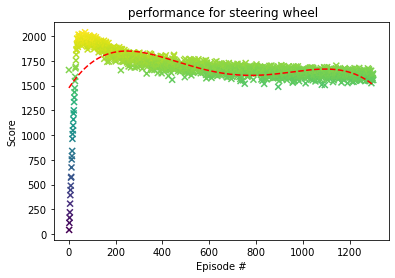

In [41]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_ste) + 1)
y = scores_ste
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for steering wheel')
plt.show()

In [57]:
def ac (current_state):
    action = np.zeros(8)
    action[5] = np.argmax(Q_brake[(current_state[5],current_state[5+8])])
    action[6] = np.argmax(Q_steering[(current_state[6],current_state[6+8])])        
    return action

In [58]:
#brake
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[5,6]] = max(ac(current_state)[[5,6]])
    if action[5] ==1:
        time_replace.append(current_state[5])
    obs , r = env(action,list(current_state))
    #print (current_state[5],current_state[6] ,action[5],r[5],obs[5] )
    current_state = obs
CountFrequency(time_replace)
#Q_brake

 790 :  234
 770 :  8
 760 :  5
 750 :  3
 775 :  11
 765 :  5
 785 :  14
 780 :  19
 755 :  4
 745 :  3
 740 :  4
 730 :  1
 735 :  2
 725 :  2
 715 :  1


In [34]:
#steering
time_replace = []
current_state = reset()
action = np.zeros(8)
#for j in range(20000):
for j in range(50000):
    action[[5,6]] = max(ac(current_state)[[5,6]])
    if action[6] ==1:
        time_replace.append(current_state[6])
    obs , r = env(action,list(current_state))
    #print (current_state[6] ,action[6],r[6],obs[6] )
    current_state = obs
CountFrequency(time_replace)

 865 :  29
 790 :  140
 860 :  44
 855 :  8
 850 :  1


# Tire and Wheel rim and motor and shifting gears

In [31]:
scores_tir = []
scores_whe = []
scores_mot= []
scores_gea= []

for epi in range(1000):# Looping through episodes 
    
    epsilon = 1/(epi+1)
    # generate an episode using pi
    states_actions_returns = play_episode(pi_tire ,pi_transmissin, pi_wheel, pi_coupling, pi_motor, pi_brake, pi_steering, pi_gears)
    # calculate Q(s,a)
    rewards_tir = []
    rewards_whe = []
    rewards_mot = []
    rewards_gea = []
    
    seen_state_action_pairs_tire = set()
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_tire = (s[0] ,s[0+8])
        state_action_tire = (s_t_tire,int(a[0]))
        
        if state_action_tire not in seen_state_action_pairs_tire:
            
            returns_tire[s_t_tire][int(a[0])] += G[0]
            N_tire[s_t_tire][int(a[0])] +=1
                
            Q_tire[s_t_tire][int(a[0])] = returns_brake[s_t_tire][int(a[0])] /N_tire[s_t_tire][int(a[0])] # Average reward across episodes
            
            seen_state_action_pairs_tire.add(state_action_tire)
            rewards_tir.append(G[0])     
            #for each s in the episode         
            A_star = np.argmax(Q_tire[s_t_tire])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_tire[(s_t_tire,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_tire[(s_t_tire,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
    
    
    seen_state_action_pairs_wheel = set()
    
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_wheel = (s[2] ,s[2+8])
        state_action_wheel = (s_t_wheel,int(a[2]))
        
        if state_action_wheel not in seen_state_action_pairs_wheel:
            
            returns_wheel[s_t_wheel][int(a[2])] += G[2]
            N_wheel[s_t_wheel][int(a[2])] +=1
                
            Q_wheel[s_t_wheel][int(a[2])] = returns_wheel[s_t_wheel][int(a[2])] /N_wheel[s_t_wheel][int(a[2])] # Average reward across episodes
            
            seen_state_action_pairs_wheel.add(state_action_wheel)
            rewards_whe.append(G[2])     
            #for each s in the episode         
            A_star = np.argmax(Q_wheel[s_t_wheel])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_wheel[(s_t_wheel,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_wheel[(s_t_wheel,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
     
    seen_state_action_pairs_motor = set()
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_motor = (s[4] ,s[4+8])
        state_action_motor = (s_t_motor,int(a[4]))
        
        if state_action_motor not in seen_state_action_pairs_motor:
            
            returns_motor[s_t_motor][int(a[4])] += G[4]
            N_motor[s_t_motor][int(a[4])] +=1
                
            Q_motor[s_t_motor][int(a[4])] = returns_motor[s_t_motor][int(a[4])] /N_motor[s_t_motor][int(a[4])] # Average reward across episodes
            
            seen_state_action_pairs_motor.add(state_action_motor)
            rewards_mot.append(G[4])     
            #for each s in the episode         
            A_star = np.argmax(Q_motor[s_t_motor])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_motor[(s_t_motor,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_motor[(s_t_motor,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
     
    seen_state_action_pairs_gears = set()
    for s, a, G in states_actions_returns:
        # check if we have already seen s
        # called "first-visit" MC policy evaluation
        s_t_gears = (s[7] ,s[7+8])
        state_action_gears = (s_t_gears,int(a[7]))
        
        if state_action_gears not in seen_state_action_pairs_gears:
            
            returns_gears[s_t_gears][int(a[7])] += G[7]
            N_gears[s_t_gears][int(a[7])] +=1
                
            Q_gears[s_t_gears][int(a[7])] = returns_gears[s_t_gears][int(a[7])] /N_gears[s_t_gears][int(a[7])] # Average reward across episodes
            
            seen_state_action_pairs_gears.add(state_action_gears)
            rewards_gea.append(G[7])     
            #for each s in the episode         
            A_star = np.argmax(Q_gears[s_t_gears])# Finding the action with maximum value        
            for a in ALL_POSSIBLE_ACTIONS: # Update action probability for s_t in policy
                if a == A_star:
                    pi_gears[(s_t_gears,a)] = 1 - epsilon + (epsilon / len(ALL_POSSIBLE_ACTIONS))
                else:
                    pi_gears[(s_t_gears,a)] = (epsilon / len(ALL_POSSIBLE_ACTIONS))
    
    
                     
    scores_tir.append(sum(rewards_tir))
    scores_whe.append(sum(rewards_whe))
                     
    scores_mot.append(sum(rewards_mot))
    scores_gea.append(sum(rewards_gea))

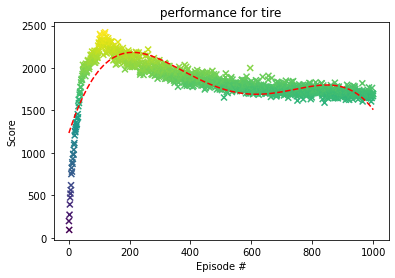

In [32]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_tir) + 1)
y = scores_tir
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for tire ')
plt.show()

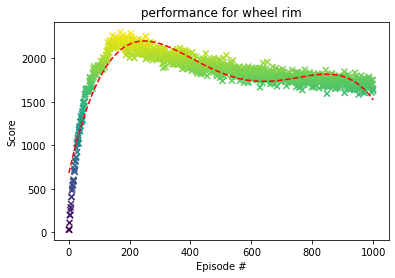

In [33]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_whe) + 1)
y = scores_whe
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for wheel rim ')
plt.show()

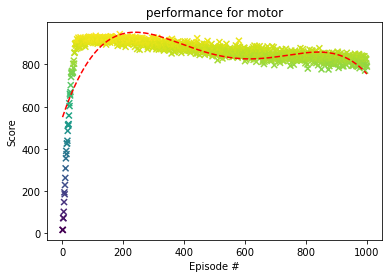

In [34]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_mot) + 1)
y = scores_mot
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for motor ')
plt.show()

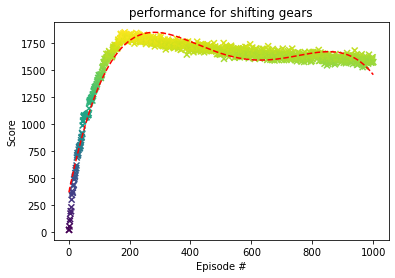

In [35]:
import matplotlib.pyplot as plt
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores_gea) + 1)
y = scores_gea
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for shifting gears ')
plt.show()

In [43]:
def ac (current_state):
    action = np.zeros(8)
    if current_state[7+8]==1:
        action[7] = 1
    else:
        action[0] = np.argmax(Q_tire[(current_state[0],current_state[0+8])])
        action[2] = np.argmax(Q_wheel[(current_state[2],current_state[2+8])])
        action[4] = np.argmax(Q_motor[(current_state[4],current_state[4+8])])
        action[2] = np.argmax(Q_gears[(current_state[7],current_state[7+8])])
    return action

In [28]:
#tire
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[0,2]] = max(ac(current_state)[[0,2]])
    if action[0] ==1:
        time_replace.append(current_state[0])
        #action[[0,2]] = 0
    obs , r = env(action,list(current_state))
    #print (current_state[0] ,action[0],r[0],obs[0] )
    current_state = obs
CountFrequency(time_replace)

 700 :  33
 725 :  28
 695 :  20
 710 :  80
 705 :  58
 720 :  40
 715 :  61
 690 :  15
 670 :  1
 685 :  3
 680 :  4
 730 :  2
 675 :  2
 665 :  2
 660 :  1


In [30]:
#wheel rim 
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action = np.zeros(8)
    action[[4,2]] = max(ac(current_state)[[4,2]])
    if action[2] ==1 and current_state[2] >= 300:
        time_replace.append(current_state[2])
    obs , r = env(action,list(current_state))
    #print (current_state[2] ,action[[2,4]],r[2],obs[2] )
    current_state = obs
CountFrequency(time_replace)

 340 :  724


In [42]:
#motor
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[4,2]] = max(ac(current_state)[[4,2]])
    if action[4] ==1:
        time_replace.append(current_state[4])
        
    obs , r = env(action,list(current_state))
    #print (current_state[4] ,action[4],r[4],obs[4] )
    current_state = obs
CountFrequency(time_replace)
#time_replace

 340 :  712
 335 :  12


In [45]:
#shifting gears
time_replace = []
current_state = reset()
action = np.zeros(8)
for j in range(50000):
    action[[7,2]] = max(ac(current_state)[[7,2]])
    if action[7] ==1:
        time_replace.append(current_state[7])
        
    obs , r = env(action,list(current_state))
    #print (current_state[7] ,action[7],r[7],obs[7] )
    current_state = obs
CountFrequency(time_replace)

 700 :  354
